### Media pipe Code Reference 

Courtesy https://github.com/google/mediapipe/blob/master/docs/solutions/pose.md

### Install correct version of library

In [1]:
#!pip install mediapipe==0.10.9

In [ ]:
#pip install opencv-python

### Visualize Raw image 

(2048, 2048, 3)
(2048, 2048, 3)


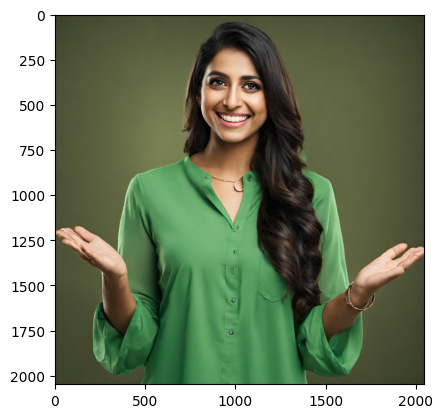

In [2]:
import cv2
from matplotlib import pyplot as plt

image_path = "girl_image_5.jpg"

img = cv2.imread(image_path)
print (img.shape)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
print (img.shape)
plt.imshow(img)


In [3]:
#!brew install wget

In [4]:
#!wget -O pose_landmarker.task -q https://storage.googleapis.com/mediapipe-models/pose_landmarker/pose_landmarker_heavy/float16/1/pose_landmarker_heavy.task

### Get landmarks from Media Pipe

In [27]:
import cv2
import mediapipe as mp
import numpy as np

mediapipe_pose = mp.solutions.pose

file = 'girl_image_5.jpg'
with mediapipe_pose.Pose(enable_segmentation=True) as pose:
    image = cv2.imread(file)
    image_height = image.shape[0]
    image_width = image.shape[1]
    pose_results = pose.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    
    left_shoulder_x = pose_results.pose_landmarks.landmark[mediapipe_pose.PoseLandmark.LEFT_SHOULDER].x * image_width
    left_shoulder_y = pose_results.pose_landmarks.landmark[mediapipe_pose.PoseLandmark.LEFT_SHOULDER].y * image_height

    right_shoulder_x = pose_results.pose_landmarks.landmark[mediapipe_pose.PoseLandmark.RIGHT_SHOULDER].x * image_width
    right_shoulder_y = pose_results.pose_landmarks.landmark[mediapipe_pose.PoseLandmark.RIGHT_SHOULDER].y * image_height

    left_thumb_x = pose_results.pose_landmarks.landmark[mediapipe_pose.PoseLandmark.LEFT_THUMB].x * image_width
    left_thumb_y = pose_results.pose_landmarks.landmark[mediapipe_pose.PoseLandmark.LEFT_THUMB].y * image_height

    right_thumb_x = pose_results.pose_landmarks.landmark[mediapipe_pose.PoseLandmark.RIGHT_THUMB].x * image_width
    right_thumb_y = pose_results.pose_landmarks.landmark[mediapipe_pose.PoseLandmark.RIGHT_THUMB].y * image_height

    left_wrist_x = pose_results.pose_landmarks.landmark[mediapipe_pose.PoseLandmark.LEFT_WRIST].x * image_width
    left_wrist_y = pose_results.pose_landmarks.landmark[mediapipe_pose.PoseLandmark.LEFT_WRIST].y * image_height

    right_wrist_x = pose_results.pose_landmarks.landmark[mediapipe_pose.PoseLandmark.RIGHT_WRIST].x * image_width
    right_wrist_y = pose_results.pose_landmarks.landmark[mediapipe_pose.PoseLandmark.RIGHT_WRIST].y * image_height

    left_elbow_x = pose_results.pose_landmarks.landmark[mediapipe_pose.PoseLandmark.LEFT_ELBOW].x * image_width
    left_elbow_y = pose_results.pose_landmarks.landmark[mediapipe_pose.PoseLandmark.LEFT_ELBOW].y * image_height

    right_elbow_x = pose_results.pose_landmarks.landmark[mediapipe_pose.PoseLandmark.RIGHT_ELBOW].x * image_width
    right_elbow_y = pose_results.pose_landmarks.landmark[mediapipe_pose.PoseLandmark.RIGHT_ELBOW].y * image_height

    left_hip_x = pose_results.pose_landmarks.landmark[mediapipe_pose.PoseLandmark.LEFT_HIP].x * image_width
    left_hip_y = pose_results.pose_landmarks.landmark[mediapipe_pose.PoseLandmark.LEFT_HIP].y * image_height


I0000 00:00:1710823822.019235       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 88), renderer: Apple M1 Pro


### Draw Landmarks on original Image

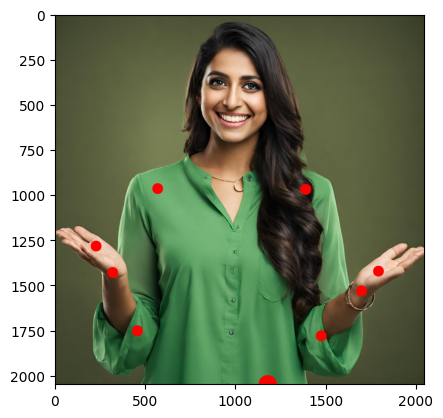

In [32]:
img = cv2.imread(file)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
cv2.circle(img, (int(left_shoulder_x), int(left_shoulder_y)), 30, (255,0,0), -1)
cv2.circle(img, (int(right_shoulder_x), int(right_shoulder_y)), 30, (255,0,0), -1)
cv2.circle(img, (int(right_thumb_x), int(right_thumb_y)), 30, (255,0,0), -1)
cv2.circle(img, (int(left_thumb_x), int(left_thumb_y)), 30, (255,0,0), -1)
cv2.circle(img, (int(right_wrist_x), int(right_wrist_y)), 30, (255,0,0), -1)
cv2.circle(img, (int(left_wrist_x), int(left_wrist_y)), 30, (255,0,0), -1)
cv2.circle(img, (int(right_elbow_x), int(right_elbow_y)), 30, (255,0,0), -1)
cv2.circle(img, (int(left_elbow_x), int(left_elbow_y)), 30, (255,0,0), -1)
cv2.circle(img, (int(left_hip_x), int(left_hip_y)), 50, (255,0,0), -1)
plt.imshow(img)

### Find angles between Landmarks

In [39]:
import numpy as np

def angle_from_x_axis(point1, point2):
    # Calculate differences in coordinates
    dy = point2[1] - point1[1]
    dx = point2[0] - point1[0]
    
    # Calculate the angle using arctan2, which returns the angle in radians
    angle_radians = np.arctan2(dy, dx)
    
    # Convert the angle from radians to degrees
    angle_degrees = np.degrees(angle_radians)
        

    # Normalize the angle to be within 0 to 180 if necessary
    if angle_degrees < 0:
        angle_degrees += 360

    # For angles in the 2nd and 3rd quadrants, adjust to reflect geometric convention
    if angle_degrees > 180:
        angle_degrees = 360 - angle_degrees

    return angle_degrees

# Example points
point1 = (1473.5615234375, 1781.7508544921875)  # This could be your origin
point2 = (1696.54296875, 1532.965576171875)    # This defines the end of the vector

point1 = (100,20 )  # This could be your origin
point2 = (100, 30)    # This defines the end of the vector


point1 = (10,20 )  # This could be your origin
point2 = (40,20)    # This defines the end of the vector

point1 = (10,20 )  # This could be your origin
point2 = (40,20)    # This defines the end of the vector

# Calculate the angle from the x-axis
angle = angle_from_x_axis(point1, point2)
print(f"The angle from the x-axis is {angle:.2f} degrees")




The angle from the x-axis is 0.00 degrees


In [40]:
vector1 = (left_shoulder_x, left_shoulder_y)
vector2 = (right_shoulder_x, right_shoulder_y)
angle = angle_from_x_axis(vector1, vector2)
print(f"The angle between the vectors is {angle:.2f} degrees")

The angle between the vectors is 179.73 degrees


In [41]:
vector1 = (left_elbow_x, left_elbow_y)
vector2 = (left_wrist_x, left_wrist_y)
angle = angle_from_x_axis(vector1, vector2)
print ('vector1',vector1)
print ('vector2',vector2)
print(f"The angle between the vectors is {angle:.2f} degrees")

vector1 (1473.5615234375, 1781.7508544921875)
vector2 (1696.54296875, 1532.965576171875)
The angle between the vectors is 48.13 degrees


In [42]:
vector1 = (left_shoulder_x, left_shoulder_y)
vector2 = (left_hip_x, left_hip_y)
angle = angle_from_x_axis(vector2, vector1)

print ('vector1',vector1)
print ('vector2',vector2)
print(f"The angle between the vectors is {angle:.2f} degrees")

vector1 (1387.292724609375, 970.1474609375)
vector2 (1177.6793212890625, 2048.569580078125)
The angle between the vectors is 79.00 degrees


### Plot landmarks using Utils

In [7]:
pose_results.pose_world_landmarks

landmark {
  x: 0.01127701
  y: -0.6003283
  z: -0.2823918
  visibility: 0.99998677
}
landmark {
  x: 0.020356268
  y: -0.6405986
  z: -0.26378417
  visibility: 0.99997795
}
landmark {
  x: 0.019596418
  y: -0.64245516
  z: -0.26375318
  visibility: 0.9999763
}
landmark {
  x: 0.019088028
  y: -0.64188445
  z: -0.26427865
  visibility: 0.99996746
}
landmark {
  x: -0.015731407
  y: -0.6371548
  z: -0.26477027
  visibility: 0.9999714
}
landmark {
  x: -0.015559851
  y: -0.63684314
  z: -0.26632643
  visibility: 0.9999684
}
landmark {
  x: -0.015396688
  y: -0.6391118
  z: -0.2656579
  visibility: 0.9999573
}
landmark {
  x: 0.07770332
  y: -0.6301694
  z: -0.14902139
  visibility: 0.9999682
}
landmark {
  x: -0.07975793
  y: -0.62703866
  z: -0.16025782
  visibility: 0.999969
}
landmark {
  x: 0.032886077
  y: -0.5790383
  z: -0.24080396
  visibility: 0.9999913
}
landmark {
  x: -0.012965215
  y: -0.57443374
  z: -0.24173021
  visibility: 0.99999034
}
landmark {
  x: 0.16631944
  y: -0.

In [8]:
mediapipe_pose.POSE_CONNECTIONS

frozenset({(0, 1),
           (0, 4),
           (1, 2),
           (2, 3),
           (3, 7),
           (4, 5),
           (5, 6),
           (6, 8),
           (9, 10),
           (11, 12),
           (11, 13),
           (11, 23),
           (12, 14),
           (12, 24),
           (13, 15),
           (14, 16),
           (15, 17),
           (15, 19),
           (15, 21),
           (16, 18),
           (16, 20),
           (16, 22),
           (17, 19),
           (18, 20),
           (23, 24),
           (23, 25),
           (24, 26),
           (25, 27),
           (26, 28),
           (27, 29),
           (27, 31),
           (28, 30),
           (28, 32),
           (29, 31),
           (30, 32)})

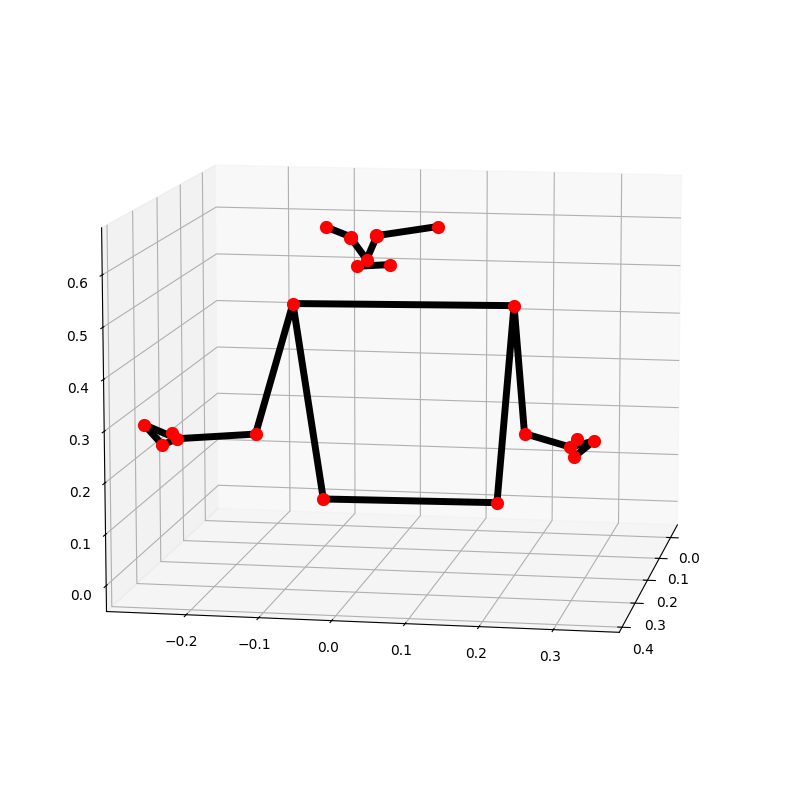

In [9]:
mp_drawing = mp.solutions.drawing_utils
mp_drawing.plot_landmarks(
        pose_results.pose_world_landmarks, mediapipe_pose.POSE_CONNECTIONS)

## Sitting Posture Angle detection 

### Sample 1. Person sitting Straight

I0000 00:00:1710866410.161017       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 88), renderer: Apple M1 Pro


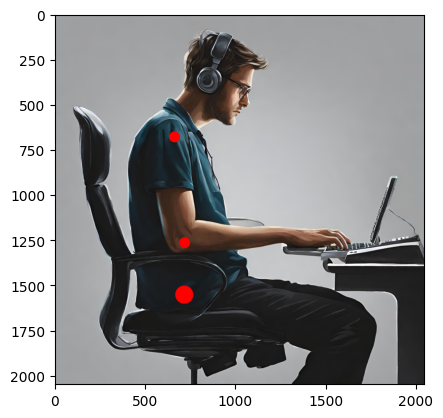

In [72]:
import cv2
import mediapipe as mp
import numpy as np

mediapipe_pose = mp.solutions.pose

file = 'person_sitting.jpg'
with mediapipe_pose.Pose(static_image_mode=True,
    model_complexity=2,
    enable_segmentation=True,
    min_detection_confidence=0.5) as pose:
    image = cv2.imread(file)
    image_height = image.shape[0]
    image_width = image.shape[1]
    pose_results = pose.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

    right_shoulder_x = pose_results.pose_landmarks.landmark[mediapipe_pose.PoseLandmark.RIGHT_SHOULDER].x * image_width
    right_shoulder_y = pose_results.pose_landmarks.landmark[mediapipe_pose.PoseLandmark.RIGHT_SHOULDER].y * image_height

    right_elbow_x = pose_results.pose_landmarks.landmark[mediapipe_pose.PoseLandmark.RIGHT_ELBOW].x * image_width
    right_elbow_y = pose_results.pose_landmarks.landmark[mediapipe_pose.PoseLandmark.RIGHT_ELBOW].y * image_height

    right_hip_x = pose_results.pose_landmarks.landmark[mediapipe_pose.PoseLandmark.RIGHT_HIP].x * image_width
    right_hip_y = pose_results.pose_landmarks.landmark[mediapipe_pose.PoseLandmark.RIGHT_HIP].y * image_height


img = cv2.imread(file)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
cv2.circle(img, (int(right_shoulder_x), int(right_shoulder_y)), 30, (255,0,0), -1)
cv2.circle(img, (int(right_elbow_x), int(right_elbow_y)), 30, (255,0,0), -1)
cv2.circle(img, (int(right_hip_x), int(right_hip_y)), 50, (255,0,0), -1)
plt.imshow(img)

In [73]:
vector1 = (right_shoulder_x, right_shoulder_y)
vector2 = (right_hip_x, right_hip_y)
#angle = angle_from_x_axis(vector1, vector2)
angle = angle_from_x_axis(vector2, vector1)

print ('vector1',vector1)
print ('vector2',vector2)
print(f"The angle between the vectors is {angle:.2f} degrees")

vector1 (661.6439208984375, 680.1398315429688)
vector2 (715.8548583984375, 1553.244873046875)
The angle between the vectors is 93.55 degrees


### Sample 2. Person Leaning Back 

I0000 00:00:1710866369.259372       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 88), renderer: Apple M1 Pro


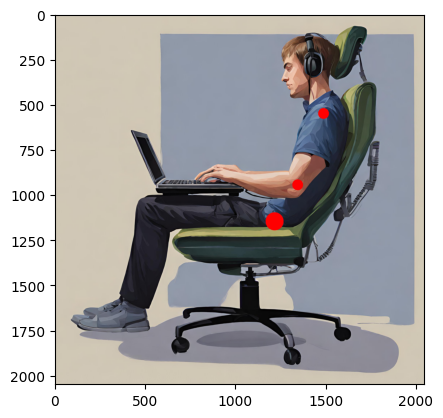

In [70]:
import cv2
import mediapipe as mp
import numpy as np

mediapipe_pose = mp.solutions.pose

file = 'person_sitting_back.jpg'
with mediapipe_pose.Pose() as pose:
    image = cv2.imread(file)
    image_height = image.shape[0]
    image_width = image.shape[1]
    pose_results = pose.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
   
    left_shoulder_x = pose_results.pose_landmarks.landmark[mediapipe_pose.PoseLandmark.LEFT_SHOULDER].x * image_width
    left_shoulder_y = pose_results.pose_landmarks.landmark[mediapipe_pose.PoseLandmark.LEFT_SHOULDER].y * image_height


    left_elbow_x = pose_results.pose_landmarks.landmark[mediapipe_pose.PoseLandmark.LEFT_ELBOW].x * image_width
    left_elbow_y = pose_results.pose_landmarks.landmark[mediapipe_pose.PoseLandmark.LEFT_ELBOW].y * image_height


    left_hip_x = pose_results.pose_landmarks.landmark[mediapipe_pose.PoseLandmark.LEFT_HIP].x * image_width
    left_hip_y = pose_results.pose_landmarks.landmark[mediapipe_pose.PoseLandmark.LEFT_HIP].y * image_height



img = cv2.imread(file)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
cv2.circle(img, (int(left_shoulder_x), int(left_shoulder_y)), 30, (255,0,0), -1)
cv2.circle(img, (int(left_elbow_x), int(left_elbow_y)), 30, (255,0,0), -1)
cv2.circle(img, (int(left_hip_x), int(left_hip_y)), 50, (255,0,0), -1)
plt.imshow(img)

In [71]:
vector1 = (left_shoulder_x, left_shoulder_y)
vector2 = (left_hip_x, left_hip_y)
#angle = angle_from_x_axis(vector1, vector2)
angle = angle_from_x_axis(vector2, vector1)

print ('vector1',vector1)
print ('vector2',vector2)
print(f"The angle between the vectors is {angle:.2f} degrees")

vector1 (1486.11083984375, 550.164306640625)
vector2 (1215.795654296875, 1147.367919921875)
The angle between the vectors is 65.65 degrees
